# Stage 2: Sentiment Analysis of Relevant Tweets
We will extract only relevant tweets from the experiment performed in Stage 1, 
obtain the sentiments using Senti-Strength Analyzer and then used the labelled data to train a supervised classifier.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keys
from geopy import OpenMapQuest
from IPython.display import IFrame
from wordcloud import WordCloud,STOPWORDS  
import folium
import time
import imageio
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
from nltk.stem.wordnet import WordNetLemmatizer
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()
STOPWORDS=set(stopwords.words('english')+list(punctuation))
STOPWORDS.remove("not")

In [3]:
processing_data=pd.read_csv('data/proData/predictedTweets1.txt')

In [4]:
processing_data.head(2)

,TweetsID,TweetsText,User_Location,Date,Baseline_Terms,Prediction
0,1216910000000000000,were doing everything we can to get our studen...,LOCATION,24/10/2020 03:29,"['get', 'need', 'get']",1
1,40367314,URL thanks user_mention amp user_mention amp ...,Danny St.,24/10/2020 03:01,[],0


In [5]:
relevant_Tweets=processing_data.copy()

In [6]:
relevant_Tweets=relevant_Tweets[relevant_Tweets['Prediction']==1] #Extracting only relevants tweets

In [7]:
relevant_Tweets['Date'] = pd.to_datetime(relevant_Tweets['Date']) #Converting Date column to Date type

In [8]:
relevant_Tweets.info() # Showing statistics of 6,848 relevamt tweets

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6385 entries, 0 to 8765
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TweetsID        6385 non-null   int64         
 1   TweetsText      6385 non-null   object        
 2   User_Location   6385 non-null   object        
 3   Date            6385 non-null   datetime64[ns]
 4   Baseline_Terms  6385 non-null   object        
 5   Prediction      6385 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 349.2+ KB


In [ ]:
#Saving distinct Tweets to CSV File

In [9]:
relevant_Tweets.to_csv('data/proData/relevantstwits.txt', index = False) 
relevant_Tweets.to_csv('data/proData/relevantstwits.csv', index = False) 

In [ ]:
# Using function get_tweet_sentimentscore()

In [23]:
sentiment_data=get_tweet_sentimentscore()

In [24]:
sentimentDataFrame=pd.DataFrame(sentiment_data)

In [25]:
sentimentDataFrame.head(2)

,TweetsID,TweetsText,User_Location,Date,Baseline_Terms,CleanText,Prediction,Positive,Negative,Sentiment_score
0,1216910000000000000,were doing everything we can to get our studen...,LOCATION,24/10/2020 03:29,"['get', 'need', 'get']",everything get students back school safely qui...,1,2,-1,Positive
1,191554292,dsnap approved for 5 louisiana parishes hit by...,"Baton Rouge, LA",23/10/2020 23:01,['hit'],approved 5 parishes hit replacements benefits ...,1,1,-1,Neutral


In [26]:
sentimentDataFrame['TweetsText'][0]

'were doing everything we can to get our students back in school safely and quickly post hurricanelaura amp hurricanedelta and are thankful to those whove helped already but we need somebody who can get us tents or something asap catholictwitter '

In [27]:
sentimentDataFrame['TweetsText'][1]

'dsnap approved for 5 louisiana parishes hit by hurricanedelta replacements for laura dsnap benefits also receive federal approval details at URL lagov delta hurricanelaura URL '

In [28]:
sentimentDataFrame.to_csv('data/proData/predictedsentimentData.csv')

# Classification Tweets into:   Positive vs Negative Vs Neutral

In [29]:
Tweet_count =sentimentDataFrame['Sentiment_score'].value_counts()
Tweet_count

Neutral     2651
Negative    1934
Positive    1800
Name: Sentiment_score, dtype: int64

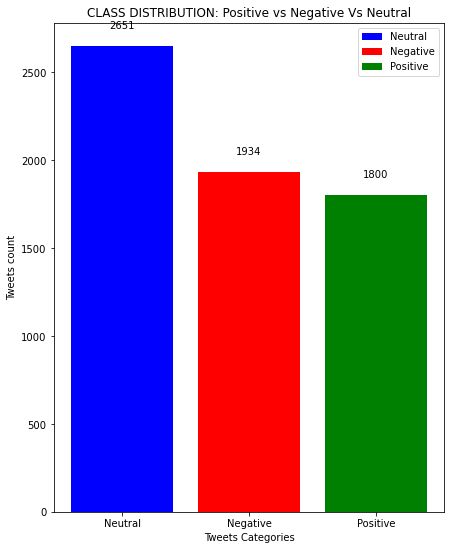

In [80]:
plot_barchat()

In [46]:
get_geocodes(sentiment_data)

Getting coordinates for tweet locations...
OpenMapQuest service timed out. Waiting.
OpenMapQuest service timed out. Waiting.
OpenMapQuest service timed out. Waiting.
OpenMapQuest service timed out. Waiting.
OpenMapQuest service timed out. Waiting.
OpenMapQuest service timed out. Waiting.
OpenMapQuest service timed out. Waiting.
OpenMapQuest service timed out. Waiting.
OpenMapQuest service timed out. Waiting.
OpenMapQuest service timed out. Waiting.
OpenMapQuest service timed out. Waiting.
OpenMapQuest service timed out. Waiting.
OpenMapQuest service timed out. Waiting.
OpenMapQuest service timed out. Waiting.
OpenMapQuest service timed out. Waiting.
OpenMapQuest service timed out. Waiting.
OpenMapQuest service timed out. Waiting.
OpenMapQuest service timed out. Waiting.
OpenMapQuest service timed out. Waiting.
OpenMapQuest service timed out. Waiting.
OpenMapQuest service timed out. Waiting.
OpenMapQuest service timed out. Waiting.
OpenMapQuest service timed out. Waiting.
OpenMapQuest s

In [48]:
sentimentDatFrame=pd.DataFrame(sentiment_data)

In [49]:
sentimentDatFrame.head(2)

,TweetsID,TweetsText,User_Location,Date,Baseline_Terms,CleanText,Prediction,Positive,Negative,Sentiment_score,latitude,longitude
0,1216910000000000000,were doing everything we can to get our studen...,LOCATION,24/10/2020 03:29,"['get', 'need', 'get']",everything get students back school safely qui...,1,2,-1,Positive,NaN,NaN
1,191554292,dsnap approved for 5 louisiana parishes hit by...,"Baton Rouge, LA",23/10/2020 23:01,['hit'],approved 5 parishes hit replacements benefits ...,1,1,-1,Neutral,30.44596,-91.18738


In [51]:
sentimentDatFrame.to_csv('data/proData/TweetCoordinates2a.csv', index = False) #Saving  Tweets Coordinates to CSV File

 # Using function US_Map(args) to generate the interactive map

In [77]:
US_Map(sentimentDatFrame)

In [76]:
from IPython.display import IFrame
IFrame(src="./disaster_map.html/", width=600,height=700)

# Visualization of most frequently used words in the dataset

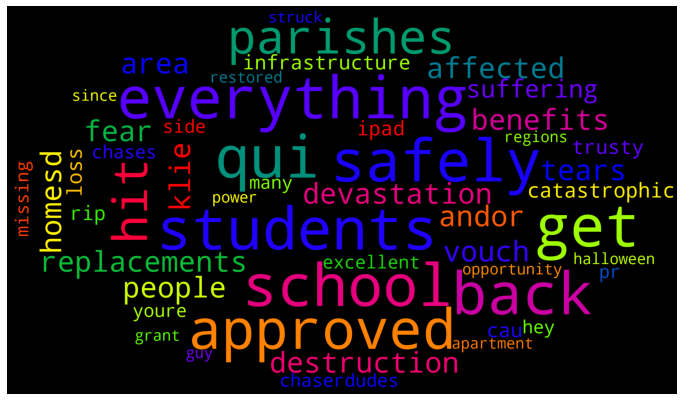

In [35]:
show_WordCloud(sentimentDataFrame)

# Neutral Tweets Overview

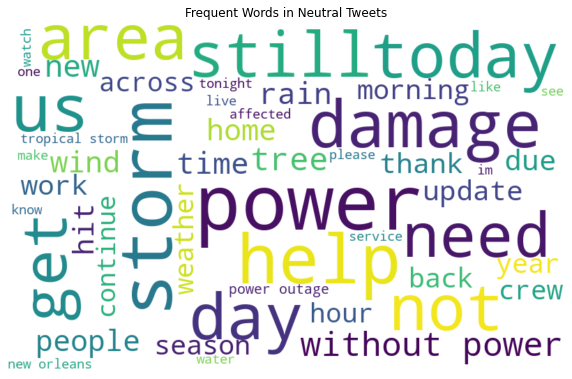

In [71]:
neutralTweets()

# Negative  Tweets Overview

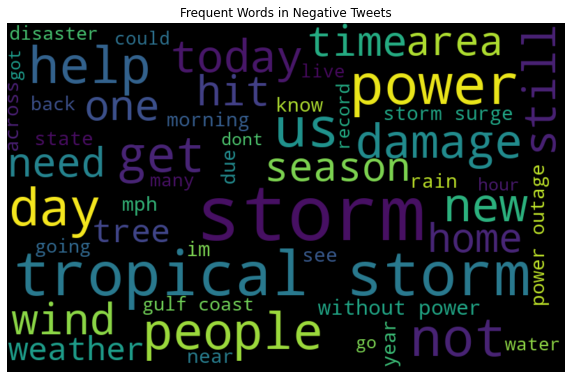

In [72]:
NegativeTweets()

# Possitive Tweets Overview

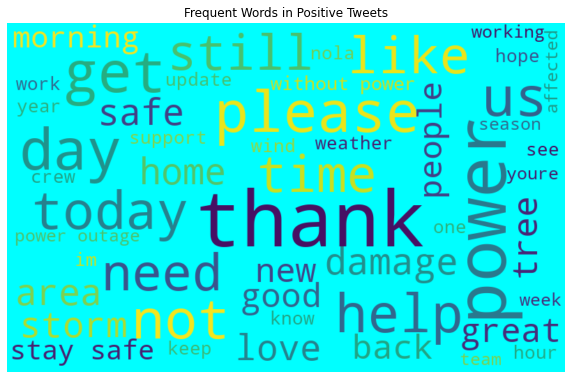

In [73]:
PositiveTweets()

In [12]:
import csv
def get_tweet_sentimentscore():
    #import csv
    from datetime import datetime
    lex1=[]
    
    reader = csv.reader(open('data/proData/predictedrelevantstwits.csv', 'r',encoding="utf8"))
    csvreader = csv.reader(reader)
    next(reader)
    for line in reader:
        lex={}
        TweetsID, TweetsText,User_Location,Date,Baseline_Terms,Prediction,Positive,Negative = line
        lex['TweetsID']=TweetsID
        lex['TweetsText']=TweetsText
        lex['User_Location']=User_Location
        lex['Date']=Date
        lex['Baseline_Terms']=Baseline_Terms
        lex['CleanText']=lemmatize_text(lex['TweetsText'])
        lex['Prediction'] = Prediction
        lex['Positive'] = int(Positive)
        lex['Negative'] = int(Negative)
        d=lex['Negative']+lex['Positive']
        d=int(d)
        if d > 0:
            lex['Sentiment_score'] ='Positive'
        elif d==0:
            lex['Sentiment_score'] ='Neutral'
        else:
            lex['Sentiment_score'] = 'Negative'
             
        lex1.append(lex)
    
    return lex1

In [78]:
def plot_barchat():
    plt.figure(figsize = (7,9))
    plt.bar(['Neutral', 'Negative','Positive'], Tweet_count.values, color = ['b', 'r','g'])
    for i, v in enumerate(Tweet_count.values):
        plt.text(i - 0.1, v + 100, str(v))
    plt.xlabel("Tweets Categories")
    plt.ylabel("Tweets count")
    plt.title("CLASS DISTRIBUTION: Positive vs Negative Vs Neutral")
    plt.savefig('compare_sentiment.png')
    plt.savefig('compare_class.png')
    colors = {'Neutral':'blue', 'Negative':'red','Positive':'green'}         
    labels = list(colors.keys())
    handles = plt.bar(['Neutral', 'Negative','Positive'], Tweet_count.values, color = ['b', 'r','g'])
    plt.legend(handles,labels)
    

In [45]:
# Method for finding GPS Cordinates of Twitter User
def get_geocodes(tweets):
    
    
    """Get the latitude and longitude for each tweet's location.
    Returns the number of tweets with invalid location data."""
    
    print('Getting coordinates for tweet locations...')
    geo = OpenMapQuest(api_key=keys.mapquest_key)  # geocoder
    bad_locations = 0  
    
    for tweet in tweets:
        
        if tweet['User_Location']!='LOCATION':
            
            processed = False
            delay = .1  # used if OpenMapQuest times out to delay next call
            while not processed:
                try:  # get coordinates for tweet['User_Location']
                    geo_location = geo.geocode(tweet['User_Location'])
                    processed = True
                except:  # timed out, so wait before trying again
                    print('OpenMapQuest service timed out. Waiting.')
                    time.sleep(delay)
                    delay += .1

            if geo_location:  
                tweet['latitude'] = geo_location.latitude
                tweet['longitude'] = geo_location.longitude
            else:  
                bad_locations += 1  # tweet['location'] was invalid
        else:
            continue
    print('Done geocoding')
    #return bad_locations

In [74]:
def US_Map(df):     
    
    #df = pd.DataFrame(tweets)
    df=df.dropna()
    ukmap = folium.Map(location=[38.8283, -98.5795],
    tiles='Stamen Terrain',
    zoom_start=5, detect_retina=True)

    for t in df.itertuples():
        text = ': '.join([t.User_Location, t.TweetsText])
        popup = folium.Popup(text, parse_html=True)
        if t.Sentiment_score=='Negative':
            icon = folium.Icon(color='red')
            marker = folium.Marker((t.latitude, t.longitude),
            popup=popup,icon=icon)
            marker.add_to(ukmap)
        elif t.Sentiment_score=='Positive':
            icon = folium.Icon(color='blue')
            marker = folium.Marker((t.latitude, t.longitude),
            popup=popup,icon=icon)
            marker.add_to(ukmap)
        elif t.Sentiment_score=='Neutral':
            icon = folium.Icon(color='yellow')
            marker = folium.Marker((t.latitude, t.longitude),
            popup=popup,icon=icon)
            marker.add_to(ukmap)
        ukmap.save('disaster_map.html')

In [65]:
def show_WordCloud(tweets,title=None):
    
    df =tweets
    df=df.dropna()
    mask_image = imageio.imread('mask_oval.png')
    wordcloud = WordCloud(colormap='prism', mask=mask_image,background_color='black',stopwords=STOPWORDS,max_words=50)
    wordcloud = wordcloud.generate(str(df['CleanText']))
    wordcloud = wordcloud.to_file('total.png')
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

In [66]:
def neutralTweets():
    neutralTweets =' '.join([text for text in sentimentDataFrame['CleanText'][sentimentDataFrame['Sentiment_score'] =='Neutral']])  
    wordcloud = WordCloud(width=800, height=500, stopwords=STOPWORDS,max_words=50,random_state = 0, max_font_size = 110,background_color='white').generate(neutralTweets)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    wordcloud = wordcloud.to_file('neutral.png')
    plt.axis('off')
    plt.title('Frequent Words in Neutral Tweets')
    plt.show()

In [67]:
def PositiveTweets():
    positiveTweets =' '.join([text for text in sentimentDataFrame['CleanText'][sentimentDataFrame['Sentiment_score'] =='Positive']])
    wordcloud = WordCloud(width=800, height=500,stopwords=STOPWORDS,max_words=50, random_state = 0, max_font_size = 110,background_color='cyan').generate(str(positiveTweets))
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    wordcloud = wordcloud.to_file('positive.png')
    plt.axis('off')
    plt.title('Frequent Words in Positive Tweets')
    plt.show()

In [68]:
def NegativeTweets():
    
    negativeTweets =' '.join([text for text in sentimentDataFrame['CleanText'][sentimentDataFrame['Sentiment_score'] =='Negative']])
    wordcloud = WordCloud(width=800, height=500,stopwords=STOPWORDS,max_words=50, random_state = 0, max_font_size = 110,background_color='black').generate(negativeTweets)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    wordcloud = wordcloud.to_file('negative.png')
    plt.axis('off')
    plt.title('Frequent Words in Negative Tweets')
    plt.show()

In [69]:
def lemmatize_text(tweets):  
    tweets = word_tokenize(tweets)
    valid_Words=[]
    for word in tweets :
        if word in STOPWORDS or word=='URL' or word=='user_mention' or word=='hurricanelaura' or word=='amp'or word=='delta'or word=='louisiana' or word=='laura' or word=='hurricane' or word=='zeta' or word=='hurricanedelta'or word=='amp' or word=='dsnap' or word=='gtgt' or 'hurricane' in word or word=='…' :continue
        valid_Words.append(word)
        #tweets=[lemma.lemmatize(word) for word in valid_Words]
        tweets=' '.join(valid_Words)
    return tweets

In [70]:
from IPython.display import HTML
HTML('''<script>
var code_show_err = false; 
var code_toggle_err = function() {
 var stderrNodes = document.querySelectorAll('[data-mime-type="application/vnd.jupyter.stderr"]')
 var stderr = Array.from(stderrNodes)
 if (code_show_err){
     stderr.forEach(ele => ele.style.display = 'block');
 } else {
     stderr.forEach(ele => ele.style.display = 'none');
 }
 code_show_err = !code_show_err
} 
document.addEventListener('DOMContentLoaded', code_toggle_err);
</script>
To toggle on/off output_stderr, click <a onclick="javascript:code_toggle_err()">here</a>.''')